In [3]:
# importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# scikit learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
import sklearn.metrics 
from sklearn.metrics import mean_squared_error as mse

- sklearn: Scikit-learn is a free software machine learning library for the Python programming language.
- sklearn.preprocessing: The sklearn.preprocessing is a package that provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
- sklearn.preprocessing.PolynomialFeatures is a class. i.e. PolynomialFeatures is a class from the package sklearn.preprocessing, which is a part of the sklearn library. (Same is true for MinMaxScaler)

## 1D Data Generation function

In [51]:
def make_1dregression_data(n=21): # Default value of n will be 21 (in case you don't enter the value of parameter n)
    
    np.random.seed(0) # With the seed reset (every time), the same set of numbers will appear every time.
                      # If the random seed is not reset, different numbers appear with every invocation
        
    xtrain = np.linspace(0.0, 20, n) # np.linspace(start, stop, num) Returns num evenly spaced samples, calculated over the interval [start, stop].
    xtest = np.arange(0.0, 20, 0.1)  # The arange([start,] stop[, step,][, dtype]) : Returns an array with evenly spaced elements as per the interval. The interval mentioned is half-opened i.e. [Start, Stop) 
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    func = lambda x: w[0]*x + w[1]*np.square(x) # Defining a function
    
    # https://stats.stackexchange.com/questions/430013/could-someone-please-translate-this-code-into-some-mathematical-notation
    ytrain = func(xtrain) + np.random.normal(0, 1, xtrain.shape) * np.sqrt(sigma2)
    ytest= func(xtest) + np.random.normal(0, 1, xtest.shape) * np.sqrt(sigma2)
    
    return xtrain, ytrain, xtest, ytest

In [52]:
xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

# checking range of input X and y
print(max(xtrain))
print(min(xtrain))
print(max(xtest))
print(min(xtest))

20.0
0.0
19.900000000000002
0.0


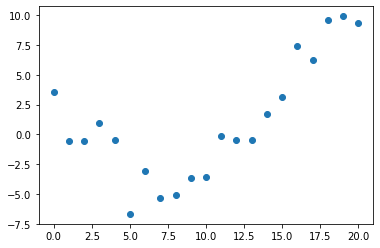

In [53]:
plt.plot(xtrain, ytrain, 'o')
plt.show()

## Data Preprocessing

In [71]:
#Rescaling data : making the data range smaller helps in faster processing
scaler = MinMaxScaler(feature_range=(-1, 1)) # Scalar is an object of MinMaxScaler class

# For knowing about the methods fit_transform(), transfort(), and fit()
# Refer: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe 
# Refer: https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/ 
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1)) 
Xtest = scaler.transform(xtest.reshape(-1, 1))


print((max(Xtrain)))
print(min(Xtest))

[1.]
[-1.]


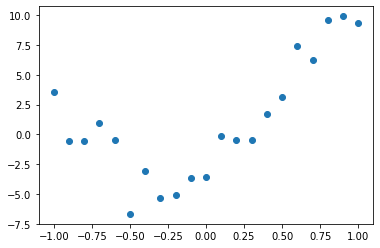

In [72]:
# After rescaling the shape hasn't changed
plt.plot(Xtrain, ytrain, 'o')
plt.show()

# Checking which degree polynomial will be the best fit for our data

In [87]:
degs = np.arange(1, 21, 1)

# Initializang the variables for a degree (ndegs)
ndegs = np.max(degs)
mse_train = np.empty(ndegs)
mse_test = np.empty(ndegs)
ytest_pred_stored = np.empty(ndegs, dtype=np.ndarray)
ytrain_pred_stored = np.empty(ndegs, dtype=np.ndarray)

In [74]:
print(degs)
print(ndegs)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
20


##  Generating a model corresponding to each degree of the polynomial

- For that, we need to first generate the feature matrix [1 x x^2 ... x^n]

In [94]:
for deg in degs:
    model = LinearRegression() # Initializing model

    poly_features = PolynomialFeatures(degree=deg, include_bias=False) # initializing feature matrix for degree n regression
    Xtrain_poly = poly_features.fit_transform(Xtrain) # generating feature matrix [1 x x^2... x^n]
    
    model.fit(Xtrain_poly, ytrain) # Training a model by providing inputs and outputs

    ytrain_pred = model.predict(Xtrain_poly)  # predicting a train data to check how model has learned
    ytrain_pred_stored[deg-1] = ytrain_pred

    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)

    mse_train[deg-1] = mse(ytrain_pred, ytrain) # finding mean squerd error between actual and predicted training dataset
    mse_test[deg-1] = mse(ytest_pred, ytest) # finding mean squerd error between actual and predicted test dataset
    ytest_pred_stored[deg-1] = ytest_pred

## Plotting the fitted functions

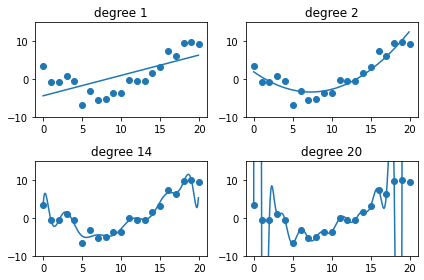

In [104]:
chosen_degs = [1, 2, 14, 20]

figure, ax = plt.subplots(nrows=2, ncols=2)


i=j=0

for deg in chosen_degs:

    ax[i,j].scatter(xtrain, ytrain)
    ax[i,j].plot(xtest, ytest_pred_stored[deg-1])
    ax[i,j].set_ylim((-10, 15))
    plt.title('degree {}'.format(deg))
    ax[i,j].set_title('degree {}'.format(deg))

    if j==0:
        j=1
    else:
        i=i+1
        j=0

figure.tight_layout()

## Plot MSE vs degree

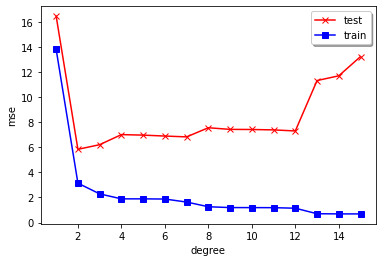

In [100]:
fig, ax = plt.subplots()
mask = degs <= 15
ax.plot(degs[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(degs[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('degree')
plt.ylabel('mse')
# pml.savefig('polyfitVsDegree.pdf')
plt.show()